<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#MSM" data-toc-modified-id="MSM-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>MSM</a></span></li><li><span><a href="#SQRA" data-toc-modified-id="SQRA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>SQRA</a></span></li><li><span><a href="#Components-of-rate-matrix" data-toc-modified-id="Components-of-rate-matrix-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Components of rate matrix</a></span></li><li><span><a href="#Timing" data-toc-modified-id="Timing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Timing</a></span></li></ul></div>

In [1]:
import sys
import os

try:
    os.chdir(r"/home/hanaz63/PAPER_MOLECULAR_ROTATIONS_2022/nobackup/molgri")
    sys.path.append(r"/home/hanaz63/PAPER_MOLECULAR_ROTATIONS_2022/nobackup")
except FileNotFoundError:
    os.chdir(r"D:\HANA\phD\PAPER_2022\molecularRotationalGrids")
    sys.path.append(r"D:\HANA\phD\PAPER_2022\molecularRotationalGrids")
    
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from molgri.plotting.widgets import ViewManager
from molgri.space.fullgrid import FullGrid
from molgri.molecules.transitions import MSM, SimulationHistogram, SQRA
from molgri.space.utils import k_argmax_in_array
from molgri.plotting.transition_plots import TransitionPlot
from molgri.paths import PATH_OUTPUT_LOGGING

sns.set_context("notebook")

In [72]:
# view functions adapted for eigenvectors

def view_most_populated_eigenv(my_sh, model, eigenvector_i=0, num_extremes=20, tau_i=0, printout=True):
    vm = ViewManager(my_sh.trajectory_universe)
    vm.fresh_view()
    my_sh.use_saved = True

    evalu, evec = model.get_eigenval_eigenvec()
    magnitudes = evec[tau_i].T[eigenvector_i]

    most_positive = k_argmax_in_array(np.abs(magnitudes), num_extremes)

    print(f"In 0th eigenvector {num_extremes} most positive cells are {list(most_positive+1)}.")
    # now assign these to trajectory frames
    assigned_frames = []
    for one_argmax in most_positive:
        all_assigned = my_sh.get_indices_same_cell(one_argmax)
        assigned_frames.extend(all_assigned)

    # for gromacs
    if printout:
        print(list(np.random.choice(np.array(assigned_frames)+1, 300)))
    vm.plot_frames_overlapping(np.random.choice(assigned_frames, 50))
    return vm

def view_most_pos_neg_eigenv(my_sh, model, eigenvector_i=1, num_extremes=20, tau_i=0, printout=True):
    vm = ViewManager(my_sh.trajectory_universe)
    vm.fresh_view()
    my_sh.use_saved = True

    evalu, evec = model.get_eigenval_eigenvec()
    magnitudes = evec[tau_i].T[eigenvector_i]

    most_positive = k_argmax_in_array(magnitudes, num_extremes)
    most_negative = k_argmax_in_array(-magnitudes, num_extremes)


    print(f"In 1st eigenvector {num_extremes} most positive cells are {list(most_positive+1)} and most negative {list(most_negative+1)}.")
    # now assign these to trajectory frames

    assigned_frames_p = []
    for one_argmax in most_positive:
        all_assigned = my_sh.get_indices_same_cell(one_argmax)
        assigned_frames_p.extend(all_assigned)
    assigned_frames_n = []
    for one_argmax in most_negative:
        all_assigned = my_sh.get_indices_same_cell(one_argmax)
        assigned_frames_n.extend(all_assigned)

    colors = ["blue",]*25
    colors.extend(["red",]*25)

    assigned_frames = list(np.random.choice(assigned_frames_p, 200))
    assigned_frames2 = list(np.random.choice(assigned_frames_n, 200))
    # for gromacs
    if printout:
        print(list(np.array(assigned_frames)+1), "and", list(np.array(assigned_frames2)+1))
    vm.plot_frames_overlapping(assigned_frames, colors=colors)
    return vm

## MSM

In [53]:
# input parameters
msm_name = "H2O_H2O_0095_50000000"
msm_fullgrid = full_grid=FullGrid(b_grid_name="20", o_grid_name="20",
                                  t_grid_name="linspace(0.2, 0.6, 10)")

#o_grid=40, b_grid=42, t_grid=linspace(0.2, 0.7, 20)
msm_use_saved = True
tau_array = np.array([1, 2, 3, 5, 7, 10, 15, 20, 30, 40, 50, 70, 80, 90, 100, 110, 130, 150, 180, 200, 220,
                      250, 270, 300])
index_tau = 5

In [54]:
water_msm_sh = SimulationHistogram(msm_name, "H2O", is_pt=False, full_grid=msm_fullgrid,
                                   second_molecule_selection="bynum 4:6", use_saved=msm_use_saved)
msm = MSM(water_msm_sh, tau_array=tau_array, use_saved=msm_use_saved)

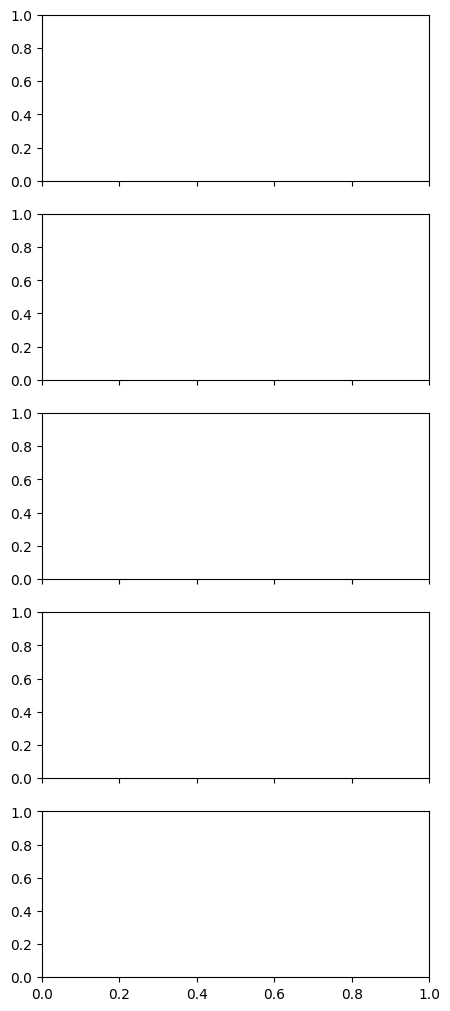

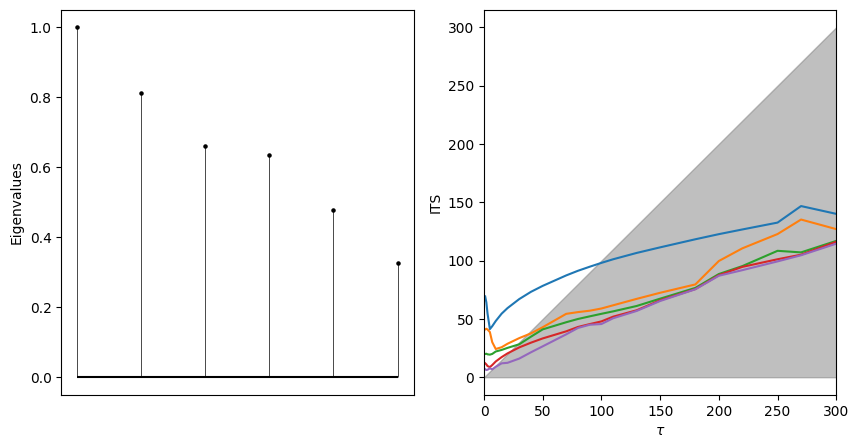

In [55]:
msm_tp = TransitionPlot((water_msm_sh, msm), tau_array=tau_array)
msm_tp.transition_obj = msm
msm_tp.simulation_histogram.use_saved = True
msm_tp.transition_obj.use_saved=True
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(10, 5))
msm_tp.plot_eigenvalues(num_eigenv=6, index_tau=index_tau, save=False, fig=fig, ax=ax[0])
msm_tp.plot_its(6, as_line=False, save=False, fig=fig, ax=ax[1])
plt.show()

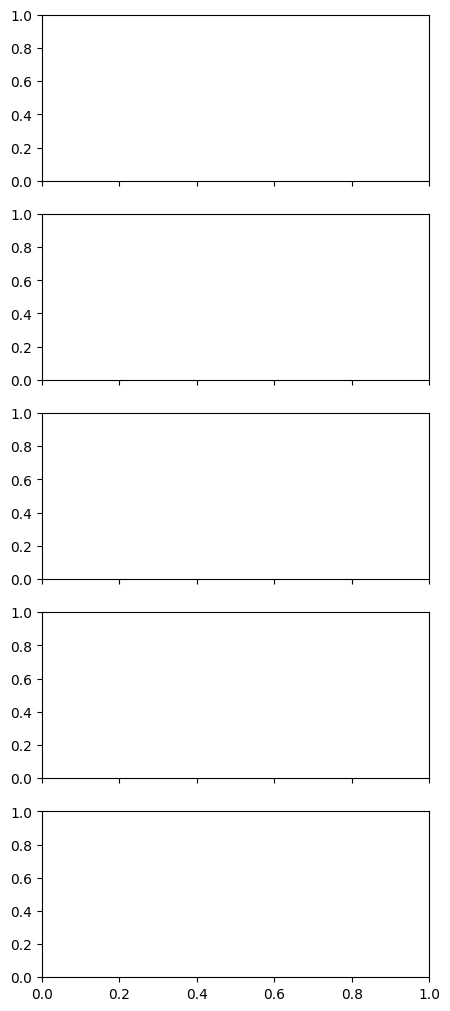

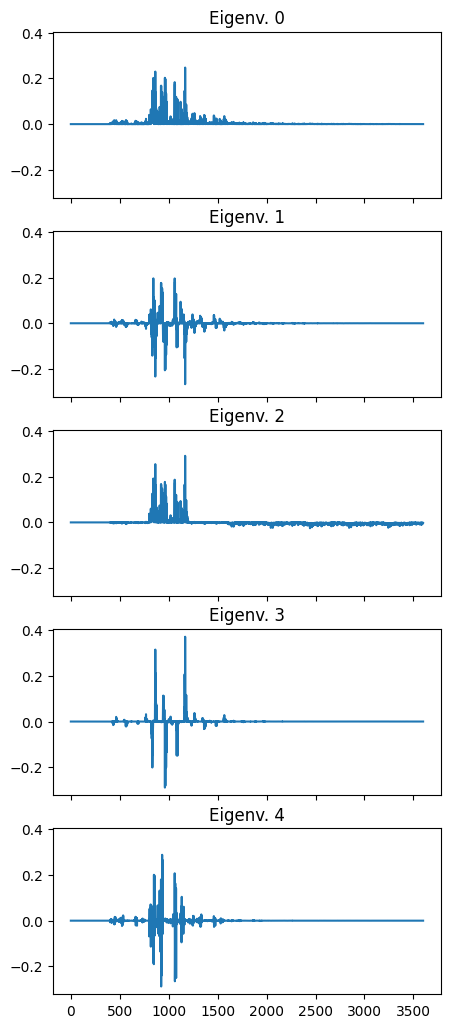

In [57]:
fig, ax = plt.subplots(5, sharex=True, sharey=True, figsize=(5, 12.5))
for i in range(5):
    msm_tp.plot_one_eigenvector_flat(i, save=False, fig=fig, ax=ax[i], index_tau=index_tau)
plt.show()

In [69]:
# MSM eigenvector 0
my_vm = view_most_populated_eigenv(water_msm_sh, msm, 0, num_extremes=20, tau_i=index_tau)
my_vm.view

In 0th eigenvector 20 most positive cells are [1077, 936, 849, 975, 931, 834, 934, 1163, 869, 974, 1064, 967, 1169, 962, 1062, 922, 864, 1065, 844, 924].
[1075089, 54757, 90594, 2360584, 2153988, 892920, 1162679, 1571080, 1253708, 1689199, 1984095, 2324946, 1538776, 1283000, 1023696, 2363634, 1475395, 2364024, 203187, 1429406, 2117712, 2135107, 2088595, 550297, 2084128, 783580, 1494950, 108354, 1084309, 2455405, 1985447, 1113713, 1764063, 460704, 1191989, 903354, 676696, 767030, 595307, 2499627, 231514, 1723156, 239631, 1805024, 501990, 824863, 526921, 1717239, 248659, 1464875, 1355498, 1699068, 2368528, 1387102, 1324168, 1817208, 2139520, 2199563, 2484657, 297253, 800900, 140197, 1806822, 1187210, 1247472, 1061696, 1442407, 21839, 190353, 1461292, 814620, 1647105, 904167, 1329177, 1058093, 2456299, 1687084, 2267444, 1405481, 2159717, 694677, 1954475, 1948039, 1715202, 1463615, 1495715, 1807310, 240034, 436328, 1308437, 1428441, 1374536, 2294067, 267652, 2486566, 1604348, 1631105, 1556

NGLWidget()

In [73]:
# MSM view eigenvector 1
my_vm = view_most_pos_neg_eigenv(water_msm_sh, msm, 1, num_extremes=20, tau_i=index_tau)
my_vm.view

In 1st eigenvector 20 most positive cells are [1074, 934, 844, 856, 1122, 922, 1068, 849, 1062, 927, 1076, 1077, 1065, 939, 1064, 931, 908, 850, 924, 936] and most negative [832, 964, 979, 967, 834, 1163, 971, 1164, 1091, 838, 975, 870, 974, 1082, 1170, 835, 869, 962, 1169, 864].
[1588605, 2251896, 2432836, 224430, 1400965, 810995, 1965244, 1343056, 1536221, 2307050, 624286, 561481, 1944459, 735668, 1936383, 336579, 558774, 340710, 2373614, 1665986, 1564830, 1996914, 1206510, 600138, 2236916, 435336, 2296283, 1252426, 2320795, 1350641, 547263, 1371060, 1897973, 856414, 2454106, 2429814, 2036204, 1979359, 1398290, 427488, 2076033, 1441636, 1147813, 19426, 1074752, 1719812, 1324169, 2047185, 2004994, 2159486, 1290354, 1955138, 1813716, 1996247, 121407, 1515647, 8956, 2072803, 2009652, 284137, 131340, 1641155, 1059461, 2110084, 2332289, 1218614, 343224, 1192788, 1521995, 1860409, 905756, 1219211, 890559, 2017068, 720904, 1880153, 1574313, 875813, 1590649, 994054, 1208933, 1966079, 905031,

IndexError: list index out of range

In [74]:
# MSM view eigenvector 2
my_vm = view_most_pos_neg_eigenv(water_msm_sh, msm, 2, num_extremes=20, tau_i=index_tau)
my_vm.view

In 1st eigenvector 20 most positive cells are [975, 974, 849, 1077, 834, 931, 934, 869, 1064, 936, 1163, 1169, 1065, 922, 962, 967, 1062, 924, 844, 864] and most negative [3362, 2049, 2162, 3249, 2849, 2522, 2662, 1644, 3062, 2562, 1664, 3264, 2449, 2864, 2444, 2044, 3244, 2844, 2464, 2064].
[50961, 225754, 598351, 1936482, 588885, 546262, 702606, 514580, 1839571, 1004325, 1189854, 2347323, 2028661, 319394, 1515572, 2135481, 252989, 998475, 1343773, 2444835, 2375855, 455419, 997180, 2475635, 1734753, 1710126, 821137, 2225805, 718147, 1195068, 720562, 1708867, 1237433, 591232, 1671474, 1502341, 1500493, 711128, 2421027, 353411, 1839734, 1072715, 622646, 1225227, 2024342, 1672284, 848987, 1871327, 1918240, 418734, 1643140, 1113203, 1857336, 2491837, 1203809, 1284134, 1191886, 139778, 695864, 1084426, 1273218, 642514, 972620, 449456, 1159423, 1733276, 1218097, 689191, 1551777, 686464, 905451, 1992943, 1531422, 432218, 2233524, 469162, 684290, 1530910, 1174167, 433440, 2405609, 542620, 871

IndexError: list index out of range

In [78]:
# MSM view eigenvector 3
my_vm = view_most_pos_neg_eigenv(water_msm_sh, msm, 3, num_extremes=10, tau_i=index_tau)
my_vm.view

In 1st eigenvector 10 most positive cells are [945, 1180, 1177, 870, 869, 1164, 1169, 1170, 1163, 864] and most negative [971, 838, 1082, 1091, 967, 834, 974, 975, 962, 835].
[1458342, 176630, 1709712, 2064868, 1910829, 1844636, 2194797, 1844567, 1224563, 253049, 2125719, 1585329, 7609, 671231, 2374852, 1921880, 2042758, 915851, 1425098, 1589886, 1238187, 502341, 1165115, 495212, 2298212, 1346702, 1491067, 176276, 1873067, 1290728, 1749191, 1034311, 1925458, 1875920, 1668464, 1482415, 1982905, 2016126, 1776194, 1225663, 1160475, 1349087, 2314491, 920011, 214476, 1801579, 914359, 1455721, 1013083, 682426, 2050337, 1226275, 2353041, 1066478, 1268344, 351097, 1208457, 1646753, 1099922, 935937, 884097, 2180280, 1243403, 330344, 658569, 1614325, 684811, 1289619, 1596381, 2373531, 468233, 1232561, 2492914, 1656535, 1951854, 177942, 659872, 55982, 412749, 1539901, 1879747, 976587, 809962, 2215492, 2359205, 1777755, 2279797, 272000, 22245, 265795, 369259, 90145, 2129039, 649870, 1006032, 65414

IndexError: list index out of range

## SQRA

In [80]:
# input parameters
# FUNCTIONS: H2O_H2O_0543
# it is redone as 0577
# try 81 82, 
sqra_name = "H2O_H2O_0585"
sqra_use_saved = True

In [81]:
# print out the information on this fullgrid
with open(f"{PATH_OUTPUT_LOGGING}{sqra_name}.log") as f:
    for line in f.readlines():
        if line.startswith("INFO:PtLogger:input grid parameters:"):
            all_param = line.split(':')[-1]
            split_param = all_param.split()
            t_grid = " ".join(split_param[2:])
            print(f"Input parameters of FullGrid: o_grid={split_param[0]}, b_grid={split_param[1]}, t_grid={t_grid}")
            break

Input parameters of FullGrid: o_grid=80, b_grid=80, t_grid=linspace(0.25, 0.35, 10)


In [82]:
full_grid = FullGrid(b_grid_name="80", o_grid_name="80", t_grid_name="linspace(0.25, 0.35, 10)",
                     use_saved=False)

water_sqra_sh = SimulationHistogram(sqra_name, "H2O", is_pt=True, full_grid=full_grid,
                second_molecule_selection="bynum 4:6", use_saved=sqra_use_saved)

sqra = SQRA(water_sqra_sh, use_saved=sqra_use_saved)
sqra.get_transitions_matrix()
sqra.get_eigenval_eigenvec(6, sigma = 0, which = "LM")

Exception ignored in: <function ReaderBase.__del__ at 0x7fa731be82c0>
Traceback (most recent call last):
  File "/home/hanaz63/miniconda3/lib/python3.11/site-packages/MDAnalysis/coordinates/base.py", line 1532, in __del__
    self.close()
  File "/home/hanaz63/miniconda3/lib/python3.11/site-packages/MDAnalysis/coordinates/XDR.py", line 186, in close
    self._xdr.close()
    ^^^^^^^^^
AttributeError: 'TRRReader' object has no attribute '_xdr'


area 12.566370614359172 [2.55555556 2.66666667 2.77777778 2.88888889 3.         3.11111111
 3.22222222 3.33333333 3.44444444 3.55555556] [0.         2.55555556 2.66666667 2.77777778 2.88888889 3.
 3.11111111 3.22222222 3.33333333 3.44444444]
In 4D, only approximate calculation of Voronoi cells is possible. Proceeding numerically.
(64000, 64000) (64000, 64000)


(array([[-2.12414769e-13, -2.57119628e-02, -9.68333463e-02,
         -1.81503993e-01, -2.24530012e-01, -3.42765261e-01]]),
 array([[[-4.41997971e-08,  4.24636247e-08, -7.45167045e-09,
           8.51683983e-08, -2.10194049e-08,  7.09145133e-09],
         [-1.30449284e-12,  2.98290856e-11,  2.30366044e-10,
           1.28963480e-10, -2.27121525e-11, -3.87047641e-11],
         [-4.19450715e-18,  4.16901029e-11,  7.82194986e-11,
          -3.78313992e-11, -2.94087393e-11,  6.11641385e-10],
         ...,
         [-5.20531525e-06,  1.07480130e-06,  2.46985418e-06,
          -8.65920967e-06, -8.56251109e-07,  5.61117363e-06],
         [-1.75610484e-07,  5.36127100e-08,  8.64922944e-08,
          -3.18522797e-07, -1.22072305e-08,  1.64058477e-07],
         [-3.70970524e-05,  1.61101335e-06,  1.50475971e-05,
          -5.28625793e-05, -1.22767928e-05,  4.69952162e-05]]]))

In [92]:
sqra_tp = TransitionPlot((water_sqra_sh, sqra))
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(10, 5))
sqra_tp.simulation_histogram.use_saved = True
sqra_tp.transition_obj.use_saved = True
sqra_tp.plot_its(6, as_line=True, save=False, fig=fig, ax=ax[1])
sqra_tp.plot_eigenvalues(num_eigenv=6, save=True, fig=fig, ax=ax[0])
# x-values are irrelevant, they are just horizontal lines
ax[1].set_xlabel("")
ax[1].set_xticks([])
plt.show()

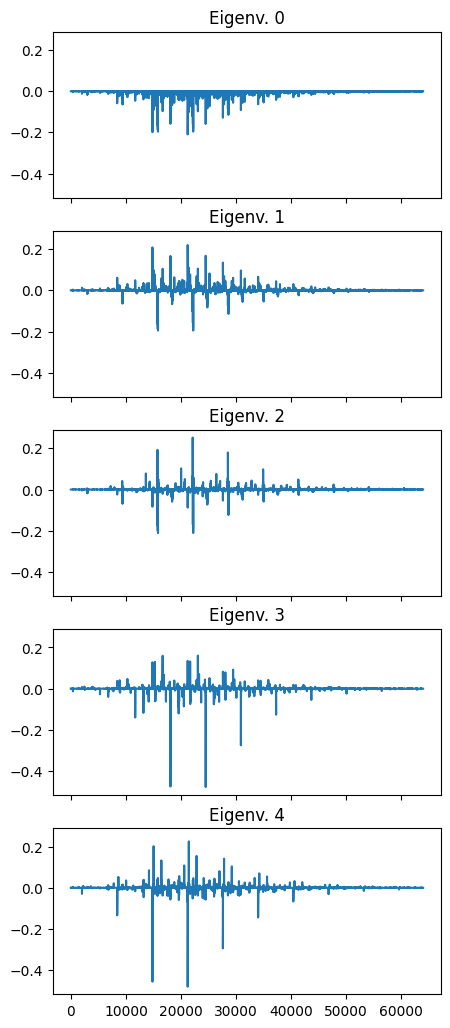

In [28]:
fig, ax = plt.subplots(5, sharex=True, sharey=True, figsize=(5, 12.5))
for i in range(5):
    sqra_tp.plot_one_eigenvector_flat(i, save=False, fig=fig, ax=ax[i])
plt.show()

In [35]:
# view eigenvector 0
my_vm = view_most_populated_eigenv(water_sqra_sh, sqra, 0, num_extremes=50, printout=False)
my_vm.view

In 0th eigenvector 50 most positive cells are [9375, 18794, 31207, 8426, 21514, 9437, 28546, 34026, 18407, 30897, 15746, 24874, 15273, 28575, 15037, 27837, 25194, 28623, 24807, 22846, 28536, 21673, 22146, 9397, 15736, 15837, 16680, 15823, 15821, 21437, 15797, 15775, 28637, 21226, 15774, 28574, 18097, 22237, 22223, 22221, 14826, 22197, 23080, 28621, 22175, 22174, 22136, 24497, 27626, 28597].


NGLWidget()

In [91]:
# view eigenvector 1
my_vm = view_most_pos_neg_eigenv(water_sqra_sh, sqra, 1, num_extremes=80, printout=False)
my_vm.view

In 1st eigenvector 80 most positive cells are [23186, 27605, 19670, 24368, 14804, 26145, 27634, 16438, 21234, 37297, 21223, 21205, 27864, 29496, 16664, 21204, 16696, 26998, 23298, 20598, 28073, 15064, 20538, 26938, 16898, 23096, 26675, 26094, 10280, 40426, 18115, 23064, 26028, 14805, 19745, 37994, 14198, 14138, 24515, 19694, 13875, 19628, 13345, 13294, 19587, 34237, 13228, 13187, 22936, 35880, 29238, 29246, 21464, 30897, 14826, 31594, 15037, 15114, 15273, 27914, 27837, 29480, 11697, 16446, 27626, 16680, 18097, 18794, 25194, 24497, 20275, 21226, 34026, 21437, 8426, 21514, 21673, 23080, 22838, 22846] and most negative [31054, 18269, 15832, 37674, 24689, 22134, 28598, 28514, 28634, 28622, 41437, 22114, 15798, 31078, 24874, 31227, 34997, 28637, 28546, 15834, 22221, 28536, 31246, 22222, 18278, 15837, 22223, 18427, 34975, 15797, 24846, 34974, 22197, 31274, 24652, 24654, 9397, 22175, 22232, 24827, 22103, 22234, 18252, 22174, 15823, 24669, 24807, 15746, 15774, 24678, 15822, 31207, 15775, 15736

IndexError: list index out of range

In [90]:
# view eigenvector 2
my_vm = view_most_pos_neg_eigenv(water_sqra_sh, sqra, 2, num_extremes=80, printout=False)
my_vm.view

In 1st eigenvector 80 most positive cells are [47736, 41314, 20710, 22131, 22102, 28641, 15850, 27084, 14284, 15915, 20643, 33520, 25370, 15711, 22104, 27118, 34903, 28681, 9346, 9336, 27120, 28489, 14320, 28511, 14318, 28715, 27070, 28716, 31835, 34914, 34908, 20684, 30423, 22241, 28650, 28534, 19035, 22316, 41346, 24023, 15884, 15714, 15689, 28688, 20670, 28684, 22281, 22111, 22315, 22284, 15708, 26433, 22288, 15703, 41336, 32833, 15888, 22250, 20033, 15734, 22146, 15736, 22136, 15746, 22134, 34936, 25435, 20720, 34946, 22114, 20718, 22108, 28503, 13633, 22103, 28546, 22089, 28536, 28508, 28514] and most negative [24702, 41421, 41374, 24698, 31103, 15832, 18298, 30353, 8426, 41437, 31054, 34026, 28634, 31246, 37607, 18269, 28598, 17553, 22174, 24703, 31207, 22175, 24807, 9375, 24689, 24678, 24669, 24654, 28574, 24652, 9374, 15834, 24827, 15837, 28575, 21226, 18407, 15823, 15822, 15821, 23953, 28597, 9421, 18446, 35037, 31227, 27626, 9423, 35023, 15774, 35021, 15775, 18252, 15798, 349

IndexError: list index out of range

In [46]:
# view eigenvector 3
my_vm = view_most_pos_neg_eigenv(water_sqra_sh, sqra, 3, num_extremes=15, printout=False)
my_vm.view

In 1st eigenvector 15 most positive cells are [23096, 27837, 23298, 16898, 15037, 28073, 27626, 21226, 16680, 14826, 21437, 23080, 21673, 29480, 15273] and most negative [26938, 25987, 13228, 23678, 21697, 26028, 20538, 37297, 19587, 13187, 19628, 11697, 30897, 18097, 24497].


NGLWidget()

In [47]:
my_vm = view_most_pos_neg_eigenv(water_sqra_sh, sqra, 4, num_extremes=15, printout=False)
my_vm.view

In 1st eigenvector 15 most positive cells are [35646, 19694, 34237, 16438, 29238, 26998, 14198, 29246, 20598, 22838, 16446, 22846, 21437, 15037, 27837] and most negative [21204, 22136, 24204, 18097, 21223, 14805, 24497, 19628, 40426, 8426, 14826, 21205, 27626, 34026, 21226].


NGLWidget()

$Q_{i j}=\frac{\mathbf{D}}{h_{i j}} \frac{\mathcal{S}_{i j}}{\mathcal{V}_i} \sqrt{\frac{\pi_j}{\pi_i}} = \mathbf{D} \cdot S_{i j} \cdot \frac{1}{\mathcal{h}_{i j}} \cdot \frac{1}{\mathcal{V}_{i}} \cdot \frac{\sqrt{\pi_j} }{\sqrt{\pi_i}}$

## Components of rate matrix

area 12.566370614359172 [2.55555556 2.66666667 2.77777778 2.88888889 3.         3.11111111
 3.22222222 3.33333333 3.44444444 3.55555556] [0.         2.55555556 2.66666667 2.77777778 2.88888889 3.
 3.11111111 3.22222222 3.33333333 3.44444444]
In 4D, only approximate calculation of Voronoi cells is possible. Proceeding numerically.
                  0
count  64000.000000
mean       6.283514
std       17.520396
min      -26.523773
25%       -5.978272
50%        3.322165
75%       13.342257
max      149.329391
Position space []
Quaternion space []


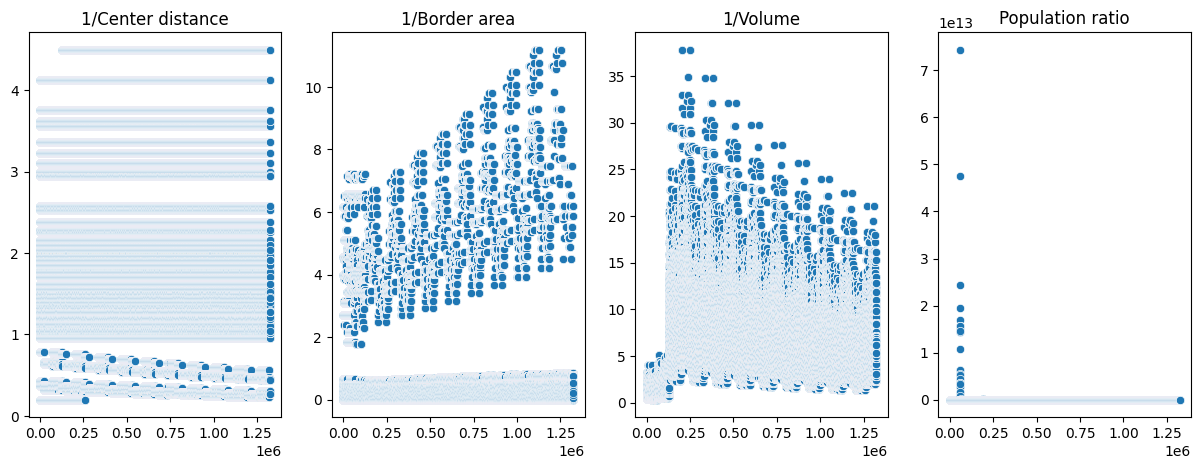

In [15]:
# print components of sqra
from scipy.constants import k as kB, N_A
import pandas as pd
T = 300

h_ij =  water_sqra_sh.full_grid.get_full_distances().tocoo()

row_indices = h_ij.row
column_indices = h_ij.col


S_ij =  water_sqra_sh.full_grid.get_full_borders()

V_i  = np.array(water_sqra_sh.full_grid.get_total_volumes())



obtained_energies = water_sqra_sh.get_magnitude_energy(energy_type="Potential")
print(pd.DataFrame(obtained_energies).describe())

without_exp = (obtained_energies[row_indices]-obtained_energies[
                column_indices])*1000/(2*kB*N_A*T)

pi_ratio = np.exp(without_exp)

#print(np.max(pi_ratio), np.argmax(pi_ratio), obtained_energies[28595], np.where(row_indices==28595), 
#      np.where(column_indices==28595))


high_e_frames = np.where(pi_ratio > 10**(80))[0]
print("Position space", [(water_sqra_sh.full_grid.get_position_index(r), water_sqra_sh.full_grid.get_position_index(c))
                         for r, c in zip(row_indices[high_e_frames], column_indices[high_e_frames])])
print("Quaternion space", [(water_sqra_sh.full_grid.get_quaternion_index(r), water_sqra_sh.full_grid.get_quaternion_index(c))
                         for r, c in zip(row_indices[high_e_frames], column_indices[high_e_frames])])

fig, ax = plt.subplots(1, 4, figsize=(15, 5))
sns.scatterplot(1/h_ij.data, ax=ax[0])
ax[0].set_title("1/Center distance")
sns.scatterplot(S_ij.data, ax=ax[1])
ax[1].set_title("Border area")
sns.scatterplot(1/V_i[row_indices], ax=ax[2])
ax[2].set_title("1/Volume")
sns.scatterplot(pi_ratio, ax=ax[3])
ax[3].set_title("Population ratio")
plt.show()

In [ ]:
# spectral decomposition example
#sqra_name = "H2O_H2O_0395"
sqra_name = "H2O_H2O_0577"
sqra_use_saved = True
water_sqra_sh = SimulationHistogram(sqra_name, "H2O", is_pt=True,
                second_molecule_selection="bynum 4:6", use_saved=sqra_use_saved)

sqra = SQRA(water_sqra_sh, use_saved=sqra_use_saved)
# eigenvectors 
k = 8
sqra_eigenval, sqra_eigenvec = sqra.get_eigenval_eigenvec(num_eigenv=k)
sqra_eigenvec = sqra_eigenvec.squeeze()
sqra_eigenvec = sqra_eigenvec[:, :k]
#print(sqra_eigenvec.shape)
#plt.scatter(*sqra_eigenvec.T)

# spectral clustering
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.decomposition import PCA

#clustering = KMeans(n_clusters=5)
#clustering.fit(sqra_eigenvec)

sc = SpectralClustering(n_clusters=14)
sc.fit(sqra.get_transitions_matrix())

# plot on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(sqra_eigenvec)
kmeans = KMeans(init="k-means++", n_clusters=6, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


## Timing


SQRA
generating a pseudotrajectory based on two water molecules and FullGrid(o_grid="42", b_grid="40", t_grid="linspace(0.2, 0.6, 20)") as well as calculating all volumes, areas, distances: cca 1min


MSM
assigning to FullGrid(o_grid="42", b_grid="40", t_grid="linspace(0.2, 0.6, 20)") + getting eigenvectors for a 50000000-step trajectory (check ausschreibefrequenz)  cca 2hours 30min